In [207]:
application = 'Watercare'

In [208]:
%matplotlib inline

In [209]:
import pathlib

In [210]:
from matplotlib import pyplot as plt 

In [211]:
import pandas as pd

In [212]:
import numpy as np

In [213]:
HOME = pathlib.Path.home()

In [214]:
varname = 'SOILM'
stat = 'mean'

In [215]:
dpath = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/{varname}")

In [216]:
lfiles = list(dpath.glob("*.csv"))

In [217]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/SOILM/daily_min_SOILM.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/SOILM/daily_mean_SOILM.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/SOILM/daily_sum_SOILM.csv'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Watercare/SOILM/daily_max_SOILM.csv')]

In [218]:
data = pd.read_csv(dpath.joinpath(f"daily_{stat}_{varname}.csv"), index_col=0, parse_dates=True)

<AxesSubplot:xlabel='time'>

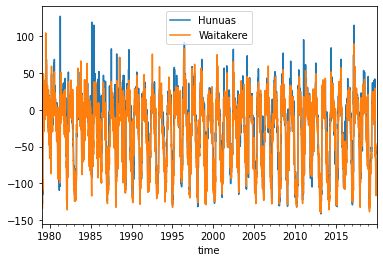

In [219]:
data.plot()

In [220]:
data.head()

,Hunuas,Waitakere
time,,
1979-01-01,-62.600,-70.833333
1979-01-02,-66.500,-76.100000
1979-01-03,-68.850,-78.666667
1979-01-04,-72.025,-82.900000
1979-01-05,-74.675,-87.666667


In [221]:
df_m = data.resample('1M').mean()

In [223]:
df_s = df_m.rolling(window=3, min_periods=3).sum()

,Hunuas,Waitakere
time,,
1979-01-31,-100.133871,-110.920430
1979-02-28,-66.633036,-70.614286
1979-03-31,-9.025000,-16.504301
1979-04-30,-6.115000,-6.842222
1979-05-31,-1.110484,-1.135484
...,...,...
2019-08-31,3.807258,4.635484
2019-09-30,-1.117500,-1.705556
2019-10-31,-6.679839,-8.650538


### threshold in mm 

In [191]:
thresh = 60

### keep all the instances where values exceed thresholds, the other are set to `np.NaN`

In [192]:
df = data.where((data >= thresh))

### set all instances that are non-null to 1

In [193]:
df = df.where(df.isnull(), 1)

### number of days per month above the threshold

In [194]:
df_m = df.resample('1M').sum()

In [195]:
df_m

,Hunuas,Waitakere
time,,
1979-01-31,0.0,0.0
1979-02-28,1.0,0.0
1979-03-31,0.0,1.0
1979-04-30,1.0,0.0
1979-05-31,0.0,0.0
...,...,...
2019-08-31,0.0,0.0
2019-09-30,0.0,0.0
2019-10-31,1.0,0.0


### adds the number of days in month, in case we want to calculate the proportion 

In [196]:
df_m.loc[:,'ndays'] = df_m.index.days_in_month 

In [197]:
df_m

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,0.0,0.0,31
1979-02-28,1.0,0.0,28
1979-03-31,0.0,1.0,31
1979-04-30,1.0,0.0,30
1979-05-31,0.0,0.0,31
...,...,...,...
2019-08-31,0.0,0.0,31
2019-09-30,0.0,0.0,30
2019-10-31,1.0,0.0,31


### 3 months rolling accumulation 

In [198]:
df_s = df_m.rolling(window=3, min_periods=3).sum()

In [199]:
df_s.head()

,Hunuas,Waitakere,ndays
time,,,
1979-01-31,NaN,NaN,NaN
1979-02-28,NaN,NaN,NaN
1979-03-31,1.0,1.0,90.0
1979-04-30,2.0,1.0,89.0
1979-05-31,1.0,1.0,92.0


### plots the distribution of the number of days exceeding threshold

In [200]:
import seaborn as sns

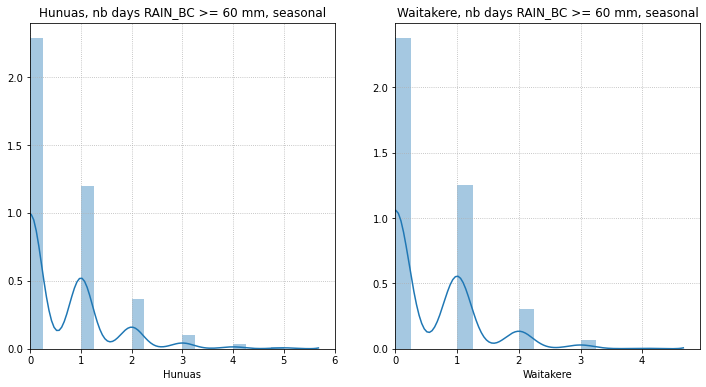

In [201]:
f, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.distplot(df_s.Hunuas, ax=axes[0])
axes[0].set_title(f'Hunuas, nb days {varname} >= {thresh} mm, seasonal')
sns.distplot(df_s.Waitakere, ax=axes[1])
axes[1].set_title(f'Waitakere, nb days {varname} >= {thresh} mm, seasonal')
[ax.grid(ls=':') for ax in axes]
[ax.set_xlim([0, None]) for ax in axes]
f.savefig(f'../distribution_Hunuas_Waitakere_nbdays_over_{thresh}mm_seasonal.png', dpi=200, bbox_inches='tight')

### saves to disk 

In [202]:
df_s.to_csv(f'../outputs/seasonal_{varname}_nbdays_over_{thresh}mm.csv')

<AxesSubplot:xlabel='time'>

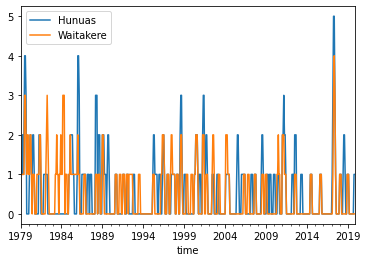

In [203]:
df_s.iloc[:,:-1].plot()

In [204]:
# df_s = df_s.assign(Hunuas_prop = df_s.Hunuas / df_s.ndays)
# df_s = df_s.assign(Waitakere_prop = df_s.Waitakere / df_s.ndays)

In [205]:
from calendar import month_abbr

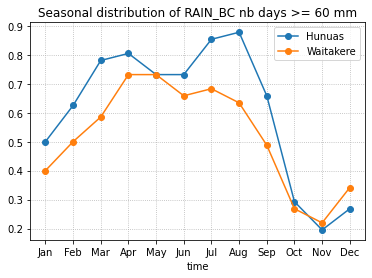

In [206]:
f, ax = plt.subplots()
df_s.groupby(df_s.index.month).mean().iloc[:,:-1].plot(ax=ax, marker='o')
ax.grid(ls=':')
ax.set_xticks(np.arange(1,12+1))
ax.set_xticklabels(month_abbr[1:]); 
ax.set_title(f"Seasonal distribution of {varname} nb days >= {thresh} mm")
f.savefig(f'../figures/seasonal_distribution_{varname}_over_{thresh}mm.png', dpi=200, bbox_inches='tight')